In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets

We have 5 csv files

.fact_bookings.csv\
.fact_aggregated_booking.csv\
.dim_date\
.dim_hotels\
.dim_rooms.csv\

In [3]:
df_bookings= pd.read_csv(r"D:\New folder (3)\fact_bookings.csv")
df_date = pd.read_csv(r"D:\New folder (3)\dim_date.csv")
df_hotels = pd.read_csv(r"D:\New folder (3)\dim_hotels.csv")
df_rooms = pd.read_csv(r"D:\New folder (3)\dim_rooms.csv")
df_agg_bookings = pd.read_csv(r"D:\New folder (3)\fact_aggregated_bookings.csv")

In [5]:
import warnings

# Ignore all warnings within this block
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

Basic Data Exploration

In [6]:
df_bookings.head(6)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [7]:
df_bookings.shape

(134590, 12)

In [8]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [9]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [10]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [11]:
df_bookings.booking_platform.value_counts()

others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: booking_platform, dtype: int64

Text(0.5, 0, 'Booking')

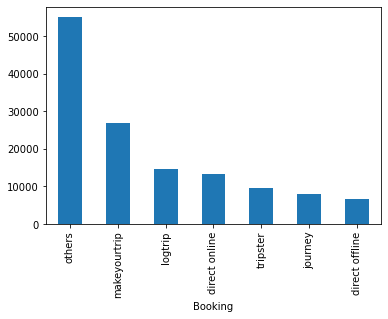

In [22]:
df_bookings.booking_platform.value_counts().plot(kind='bar')
plt.xlabel("Booking")

In [13]:
df_bookings.describe(include= 'all')

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
count,134590,134590.000000,134590,134590,134590,134587.000000,134590,134590,56683.000000,134590,1.345900e+05,134590.000000
unique,134590,NaN,116,92,97,NaN,4,7,NaN,3,NaN,NaN
top,May242218558RT311,NaN,8/6/2022,16-07-22,9/5/2022,NaN,RT2,others,NaN,Checked Out,NaN,NaN
freq,1,NaN,1670,2017,1840,NaN,49505,55066,NaN,94411,NaN,NaN
mean,NaN,18061.113493,NaN,NaN,NaN,2.036170,NaN,NaN,3.619004,NaN,1.537805e+04,12696.123256
std,NaN,1093.055847,NaN,NaN,NaN,1.034885,NaN,NaN,1.235009,NaN,9.303604e+04,6928.108124
min,NaN,16558.000000,NaN,NaN,NaN,-17.000000,NaN,NaN,1.000000,NaN,6.500000e+03,2600.000000
25%,NaN,17558.000000,NaN,NaN,NaN,1.000000,NaN,NaN,3.000000,NaN,9.900000e+03,7600.000000
50%,NaN,17564.000000,NaN,NaN,NaN,2.000000,NaN,NaN,4.000000,NaN,1.350000e+04,11700.000000
75%,NaN,18563.000000,NaN,NaN,NaN,2.000000,NaN,NaN,5.000000,NaN,1.800000e+04,15300.000000


In [14]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [15]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [16]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [17]:
df_hotels.category.value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

In [18]:
df_hotels.city.value_counts().sort_values(ascending=False) ## Default ASC

Mumbai       8
Bangalore    6
Hyderabad    6
Delhi        5
Name: city, dtype: int64

Text(0.5, 0, 'city')

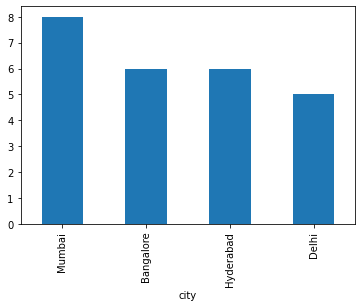

In [21]:
df_hotels.city.value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.xlabel("city")

In [23]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [24]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


# 1. Find out unique property ids in aggregate bookings dataset

In [25]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

# 2. Find out total bookings per property_id

In [26]:
df_agg_bookings.property_id.value_counts()

18561    368
16563    368
19558    368
16559    368
18558    368
17558    368
19559    368
16558    368
18559    368
17564    368
17563    368
19562    368
18562    368
16560    368
17562    368
19563    368
16562    368
18563    368
17561    368
19560    368
16561    368
18560    368
17560    368
19561    368
17559    368
Name: property_id, dtype: int64

# 3. Find out days on which bookings are greater than capacity

In [27]:
## Accessing columns

df_agg_bookings.loc[:,'capacity']
df_agg_bookings.capacity
df_agg_bookings['capacity']

0       30.0
1       30.0
2       30.0
3       19.0
4       19.0
        ... 
9195    18.0
9196    18.0
9197     6.0
9198     6.0
9199     4.0
Name: capacity, Length: 9200, dtype: float64

In [28]:
## Accessing 2 columns

df_agg_bookings[['successful_bookings','capacity']]

df_agg_bookings.loc[:,['successful_bookings','capacity']]

,successful_bookings,capacity
0,25,30.0
1,28,30.0
2,23,30.0
3,30,19.0
4,18,19.0
...,...,...
9195,13,18.0
9196,13,18.0
9197,3,6.0
9198,3,6.0


In [29]:
#Accessing all the columns in dataframe using specific condition

df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity] 

#Accessing only 2 specific columns in dataframe using specific condition

df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity] [['successful_bookings','capacity']]

,successful_bookings,capacity
3,30,19.0
12,100,41.0
4136,50,39.0
6209,123,26.0
8522,35,24.0
9194,20,18.0


In [30]:
df_agg_bookings.query('successful_bookings > capacity') [['successful_bookings','capacity']]

,successful_bookings,capacity
3,30,19.0
12,100,41.0
4136,50,39.0
6209,123,26.0
8522,35,24.0
9194,20,18.0


# 4. Find out properties that have highest capacity

In [31]:
df_agg_bookings.loc[:,'capacity'].max()

50.0

In [32]:
df_agg_bookings.capacity.max()

50.0

In [33]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [34]:
p = df_agg_bookings[df_agg_bookings.capacity == df_agg_bookings.capacity.max()] [['property_id','capacity','room_category']]
    
p

,property_id,capacity,room_category
27,17558,50.0,RT2
128,17558,50.0,RT2
229,17558,50.0,RT2
328,17558,50.0,RT2
428,17558,50.0,RT2
...,...,...,...
8728,17558,50.0,RT2
8828,17558,50.0,RT2
8928,17558,50.0,RT2
9028,17558,50.0,RT2


In [35]:
p.room_category.unique()

array(['RT2'], dtype=object)

#  2. Data Cleaning

In [36]:
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


# Removing the data from data frame with negative guests

In [37]:
df_bookings[df_bookings.no_guests<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [38]:
### Removing the data from data frame with negative guests

df_bookings = df_bookings[df_bookings.no_guests>0]

df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


# 2 Outlier removal in revenue generated

In [40]:
df_bookings.revenue_generated.describe()

count    1.345780e+05
mean     1.537804e+04
std      9.304015e+04
min      6.500000e+03
25%      9.900000e+03
50%      1.350000e+04
75%      1.800000e+04
max      2.856000e+07
Name: revenue_generated, dtype: float64

In [41]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max(),df_bookings.revenue_generated.mean()

(6500, 28560000, 15378.036937686695)

In [42]:
lower_limit = df_bookings.revenue_generated.mean() - 3*df_bookings.revenue_generated.std()
lower_limit

-263742.4278566132

In [43]:
higher_limit = df_bookings.revenue_generated.mean() + 3*df_bookings.revenue_generated.std()
higher_limit

294498.50173198653

In [44]:
df_bookings[df_bookings.revenue_generated > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [45]:
df_bookings = df_bookings[df_bookings.revenue_generated < higher_limit]

df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


# 2 Outlier removal in revenue generated

In [46]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [47]:
lower_limit = df_bookings.revenue_realized.mean() - 3*df_bookings.revenue_realized.std()
lower_limit

-8087.391491610155

In [48]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

33479.3586618449

In [49]:
df_bookings[df_bookings.revenue_realized>higher_limit].shape

(1299, 12)

In [50]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [51]:
df_bookings[df_bookings.revenue_realized>higher_limit].room_category.value_counts()

RT4    1299
Name: room_category, dtype: int64

In [52]:
df_bookings[df_bookings.room_category == 'RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [53]:
lower_limit = 23439.308444 - 3*9048.599076
lower_limit

-3706.4887840000047

In [54]:
Higher_limit = 23439.308444 + 3*9048.599076
Higher_limit

50585.105672000005

In [55]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

## In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)

In [56]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [57]:
M = df_agg_bookings.capacity.mean()
M

25.280495759947815

In [58]:
df_agg_bookings['capacity'].fillna(25.280495759947815,inplace = True)

In [59]:
df_agg_bookings['capacity'].isnull().sum()

0

## In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records.

In [60]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [61]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [62]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings <=df_agg_bookings.capacity]
df_agg_bookings.shape

(9194, 5)

 # 3. Data Transformation
Create occupancy percentage column

In [63]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


In [64]:
df_agg_bookings['occu_per']= round((df_agg_bookings['successful_bookings'] / df_agg_bookings['capacity'])*100,2)

## df_agg_bookings['occu_per'] = df_agg_bookings['occu_per'].apply(lambda x: round(x*100,2))

<ipython-input-64-0f98bb4fef4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_bookings['occu_per']= round((df_agg_bookings['successful_bookings'] / df_agg_bookings['capacity'])*100,2)


In [65]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22
9196,16559,31-Jul-22,RT4,13,18.0,72.22
9197,17558,31-Jul-22,RT4,3,6.0,50.00
9198,19563,31-Jul-22,RT4,3,6.0,50.00


In [66]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


#  4. Insights Generation

# 1. What is an average occupancy rate in each of the room categories?

In [68]:
G = df_agg_bookings.groupby('room_category')
G.occu_per.mean()

room_category
RT1    57.888985
RT2    58.009756
RT3    58.028213
RT4    59.277925
Name: occu_per, dtype: float64

In [69]:
df_agg_bookings.groupby('room_category').occu_per.mean()

room_category
RT1    57.888985
RT2    58.009756
RT3    58.028213
RT4    59.277925
Name: occu_per, dtype: float64

In [70]:
df_agg_bookings.groupby('room_category') ['occu_per'].mean()

room_category
RT1    57.888985
RT2    58.009756
RT3    58.028213
RT4    59.277925
Name: occu_per, dtype: float64

In [71]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [72]:
 mer = pd.merge(df_agg_bookings,df_rooms,left_on='room_category', right_on='room_id')

In [84]:
mer

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,Standard
...,...,...,...,...,...,...,...
9189,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential
9190,16559,31-Jul-22,RT4,13,18.0,72.22,Presidential
9191,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential
9192,19563,31-Jul-22,RT4,3,6.0,50.00,Presidential


In [74]:
mer.groupby('room_class')['occu_per'].mean().round(2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.89
Name: occu_per, dtype: float64

In [75]:
mer.drop('room_id',axis = 1,inplace= True) ## Dropped room_id as we have 2 columns with same data
mer

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,Standard
...,...,...,...,...,...,...,...
9189,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential
9190,16559,31-Jul-22,RT4,13,18.0,72.22,Presidential
9191,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential
9192,19563,31-Jul-22,RT4,3,6.0,50.00,Presidential


# 2. Print average occupancy rate per city

In [76]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [77]:
merg = pd.merge(mer,df_hotels,on='property_id',how = 'outer')
merg

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,53.33,Standard,Atliq Exotica,Luxury,Mumbai
...,...,...,...,...,...,...,...,...,...,...
9189,16563,27-Jul-22,RT4,10,18.0,55.56,Presidential,Atliq Palace,Business,Delhi
9190,16563,28-Jul-22,RT4,9,18.0,50.00,Presidential,Atliq Palace,Business,Delhi
9191,16563,29-Jul-22,RT4,9,18.0,50.00,Presidential,Atliq Palace,Business,Delhi
9192,16563,30-Jul-22,RT4,11,18.0,61.11,Presidential,Atliq Palace,Business,Delhi


In [78]:
merg.groupby('city') ['occu_per'].mean().round(2)

city
Bangalore    56.33
Delhi        61.51
Hyderabad    58.12
Mumbai       57.91
Name: occu_per, dtype: float64

<AxesSubplot:xlabel='city'>

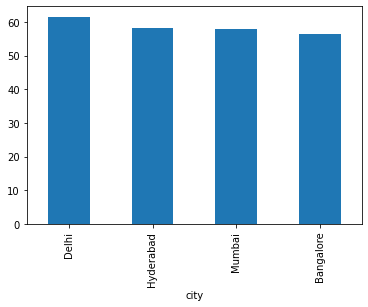

In [79]:
merg.groupby('city') ['occu_per'].mean().round(2).sort_values(ascending= False).plot(kind = 'bar')

# 3. When was the occupancy better? Weekday or Weekend?

In [118]:
merg.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,53.33,Standard,Atliq Exotica,Luxury,Mumbai


In [81]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [86]:
merge_df = pd.merge(merg, df_date,left_on = 'check_in_date',right_on = 'date')
merge_df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [87]:
merge_df.groupby('day_type') ['occu_per'].mean().round(2)

day_type
weekeday    50.88
weekend     72.34
Name: occu_per, dtype: float64

# 4: In the month of June, what is the occupancy for different cities

In [88]:
merge_df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occu_per,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [89]:
Jun = merge_df.groupby(['city','mmm yy']) ['occu_per'].mean()
Jun

city       mmm yy
Bangalore  Jul 22    53.899829
           Jun 22    56.436143
           May 22    55.275492
Delhi      Jul 22    59.177886
           Jun 22    62.474286
           May 22    59.650614
Hyderabad  Jul 22    55.252163
           Jun 22    58.458075
           May 22    57.062405
Mumbai     Jul 22    55.235469
           Jun 22    58.382560
           May 22    56.803139
Name: occu_per, dtype: float64

In [91]:
Jun.loc[Jun.index.get_level_values('mmm yy') =='Jun 22',:]

city       mmm yy
Bangalore  Jun 22    56.436143
Delhi      Jun 22    62.474286
Hyderabad  Jun 22    58.458075
Mumbai     Jun 22    58.382560
Name: occu_per, dtype: float64

# 6. Print revenue realized per city

In [92]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [93]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [94]:
rev_realized = pd.merge(df_bookings,df_hotels,on = 'property_id')
rev_realized.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [95]:
rev_realized.groupby('city')['revenue_realized'].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

# 7. Print month by month revenue

In [96]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [97]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [98]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [99]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 13.3+ MB


In [100]:
df_date['date']= pd.to_datetime(df_date['date'])

df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [101]:
import pandas as pd
df_bookings.head(3)

<ipython-input-101-f220ab7ade1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bookings['check_in_date'] = pd.to_datetime(df_bookings['check_in_date'], errors='coerce', infer_datetime_format=True)


In [103]:
df_bookings['check_in_date'] = pd.to_datetime(df_bookings['check_in_date'], errors='coerce', infer_datetime_format=True)
df_bookings.head(3)

<ipython-input-103-a3502451ade6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bookings['check_in_date'] = pd.to_datetime(df_bookings['check_in_date'], errors='coerce', infer_datetime_format=True)


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [104]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      55790 non-null   datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 13.3+ MB


In [105]:
df_bookings_all = pd.merge(df_bookings, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,2022-05-05,May 22,W 19,weekeday


In [106]:
df_bookings_all.groupby('mmm yy')['revenue_realized'].sum()

mmm yy
Jul 22    60278496
Jun 22    52903014
May 22    60961428
Name: revenue_realized, dtype: int64

<AxesSubplot:xlabel='mmm yy'>

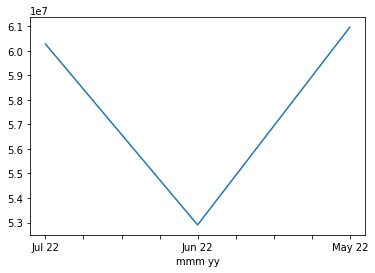

In [107]:
df_bookings_all.groupby('mmm yy')['revenue_realized'].sum().plot()

# Exercise-1. Print revenue realized per hotel type

In [108]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [109]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [110]:
hotels_data = pd.merge(df_hotels,df_bookings,on= 'property_id')
hotels_data.head(3)

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT15,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT16,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


<AxesSubplot:xlabel='property_name'>

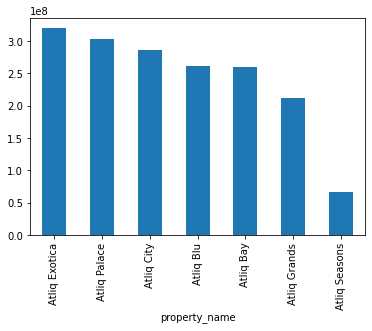

In [111]:

hotels_data.groupby('property_name')['revenue_realized'].sum().sort_values(ascending = False).plot(kind='bar')

# Exercise-2 Print average rating per city

In [112]:
hotels_data.head(3)

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT15,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT16,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [113]:
hotels_data.groupby('city')['ratings_given'].mean().round(2).sort_values(ascending = False)

city
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Bangalore    3.41
Name: ratings_given, dtype: float64

 #['ratings_given'].mean().round(2).sort_values(ascending = False).plot(kind='area',stacked = False)

<AxesSubplot:xlabel='city'>

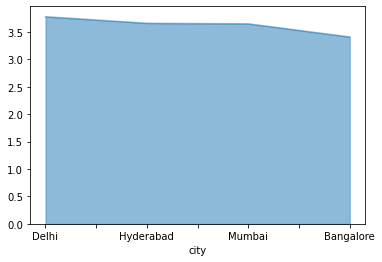

In [114]:
hotels_data.groupby('city')['ratings_given'].mean().round(2).sort_values(ascending = False).plot(kind='area',stacked = False)

# Exercise-3 Print a pie chart of revenue realized per booking platform

In [115]:

hotels_data.head(3)

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT15,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT16,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [116]:
hotels_data.groupby('booking_platform')['revenue_realized'].sum()

booking_platform
direct offline     86374933
direct online     168948637
journey           102531334
logtrip           187494028
makeyourtrip      340814104
others            699306762
tripster          123066801
Name: revenue_realized, dtype: int64

<AxesSubplot:ylabel='revenue_realized'>

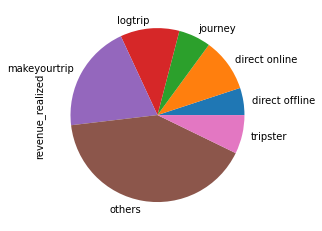

In [117]:
hotels_data.groupby('booking_platform')['revenue_realized'].sum().plot(kind = 'pie')